### 1. Total value of the Salary Sheet -> What was the total expense on employee salaries by the company? <br>
    Calculate the total salary for each employee, salary + benefits + taxes, then sum all salaries

In [2]:
import pandas as pd

employee_registration = pd.read_csv(r'CadastroFuncionarios.csv', sep=';', decimal=',')

employee_registration['Salário Total'] = employee_registration['Salario Base'] + employee_registration['Impostos'] + employee_registration['Beneficios'] + employee_registration['VT'] + employee_registration['VR']

total_expense_employee = employee_registration['Salário Total'].sum()

print(f'The Total expense on employee are {total_expense_employee:,}')
employee_registration

The Total expense on employee are 2,717,493.22


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Salário Total
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações,38208.04
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística,9915.36
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo,28195.32
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo,36962.66
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo,9568.36
...,...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística,19104.18
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial,7875.92
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo,42616.32
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial,9605.88


### 2. What was the company's revenue?<br>
    Calculate the total revenue for each service and then add the revenue for all

In [3]:
services_database = pd.read_excel('BaseServiçosPrestados.xlsx')
client_registration = pd.read_csv(r'CadastroClientes.csv', sep=';', decimal=',')

display(services_database)
display(client_registration)

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


In [4]:
merge_services_clients = services_database.merge(client_registration, on = 'ID Cliente')

merge_services_clients['Valor Contrato Total'] = merge_services_clients['Tempo Total de Contrato (Meses)'] * merge_services_clients['Valor Contrato Mensal']

total_revenue = sum(merge_services_clients['Valor Contrato Total'])
print(f'The revenue was {total_revenue:,}')

merge_services_clients

The revenue was 5,519,160


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Cliente,Valor Contrato Mensal,Valor Contrato Total
0,OS0001,67,1,14,Teixeira Gonçalves,540,7560
1,OS0002,17,2,12,Souza Santos,1260,15120
2,OS0003,116,4,14,Santos Costa,2520,35280
3,OS0004,37,5,8,Do Monteiro,3510,28080
4,OS0005,130,6,8,Soares Lobo,2340,18720
...,...,...,...,...,...,...,...
232,OS0233,111,315,4,Americo Bomfim,1575,6300
233,OS0234,124,316,8,Manoel Costa,3690,29520
234,OS0235,72,317,6,Gomes Machado,2385,14310
235,OS0236,90,319,14,Pereira Fazenda,4185,58590


### 3. What % of employees have already signed a contract?<br>
    In the service base we have the employee who closed each service. But not all the employees that the company has have already closed some service.
    . In the employee base we have a list of all employees
    . We want to calculate Qty_Employees_Closed_Service / Qty_Employees_Totals
    . To calculate the number of employees who closed a service, use the service base and count how many employees there are. But remember, each employee can only be counted once.
    If you apply the .unique() method on a variable which is just 1 column of a dataframe, it will delete all duplicate values from that column.
    Ex: unique_columnA = dataframe['columnA'].unique() gives you as a response a list with all items in columnA appearing only once. All repeated values of columnA are excluded from the unicos_columnA variable

In [5]:
unique_employee_sellers = len(services_database['ID Funcionário'].unique())
unique_employee_counting = len(employee_registration['ID Funcionário'].unique())

percent_employees_sellers = unique_employee_sellers/unique_employee_counting

print(f'{percent_employees_sellers:.2%} of employees have already signed a contract')

86.84% of employees have already signed a contract


#### 4. Calculate the total number of contracts that each area of the company has already closed

Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


Text(0.5, 1.0, 'Number of contracts closed by area')

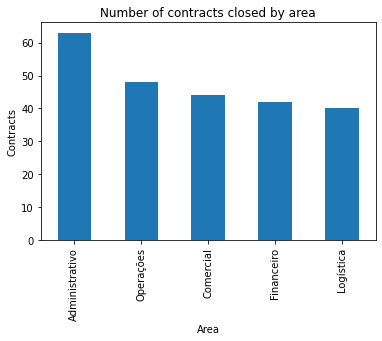

In [19]:
import matplotlib.pyplot as plt

employees_areas = employee_registration[['ID Funcionário', 'Area']]
filtered_service_database = services_database[['ID Funcionário', 'Codigo do Servico']]

merge_areas_services = filtered_service_database.merge(employees_areas, on = 'ID Funcionário')

areas_sales_count = merge_areas_services['Area'].value_counts()

print(areas_sales_count)

areas_sales_count.plot(kind = 'bar')

plt.xlabel('Area')
plt.ylabel('Contracts')
plt.title('Number of contracts closed by area')

### 5. Calculate the total number of employees by area

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


Text(0.5, 1.0, 'Number of employees by area')

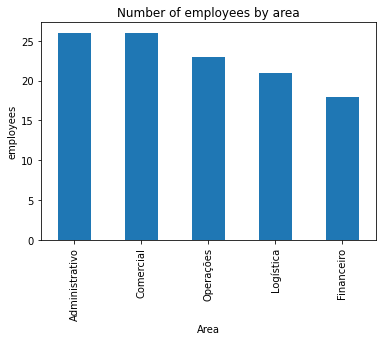

In [18]:
areas_employees_count = employee_registration['Area'].value_counts()

print(areas_employees_count)

areas_employees_count.plot(kind = 'bar')

plt.xlabel('Area')
plt.ylabel('employees')
plt.title('Number of employees by area')

### 6. What is the average monthly ticket (average monthly revenue) of the contracts?<br>
    .mean() calculates the average -> exemple: media_colunaA = dataframe['colunaA'].mean()

In [12]:
average_monthly_ticket = client_registration['Valor Contrato Mensal'].mean()

print(f'The value of the average monthly ticket is {average_monthly_ticket:,.2f}')

The value of the average monthly ticket is 2,502.56
